In [1]:
import warnings
warnings.filterwarnings('ignore')


# Credit Card Fraud Deduction - Using ML Model


In [2]:
# Importing the Essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Instering the Data set 

df  = pd.read_csv('card_transdata.csv')


In [4]:
# Display the First 5 rows in the Dataset
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
# Display the last 5 rows in the Dataset.

df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [6]:
# Identify the Shape of the Dataset.

df.shape

(1000000, 8)

In [7]:
# Display the Data Types of the Columns in the Dataset.

df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
# Checking for the null Values in the Dataset.

df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [9]:
# As repeat_retailer,Used_chip,used_pin_number,online_order,fraud are binary Variables converting them to int.

df[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']] = df[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']].astype(int)

In [10]:
# Checking whether the Data is balance or imbalanced.         # The Data is Highly imbalanced.

df['fraud'].value_counts()

fraud
0    912597
1     87403
Name: count, dtype: int64

# Visual Representation of Distribution among the Varaibles.

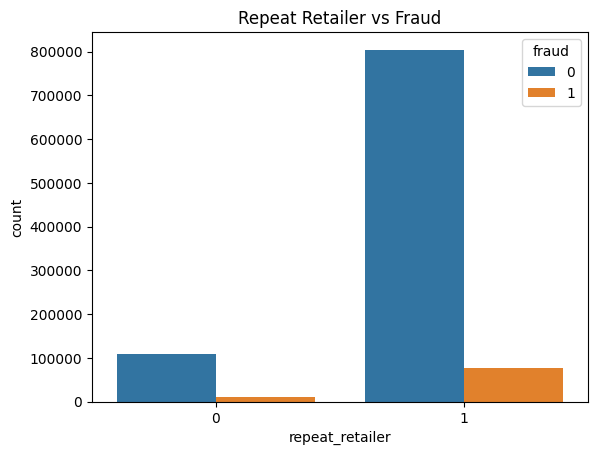

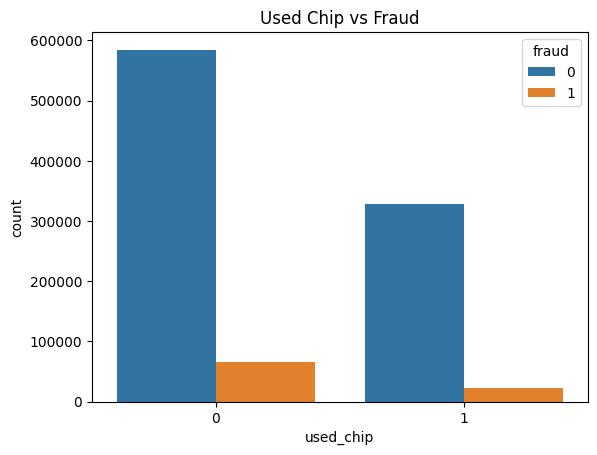

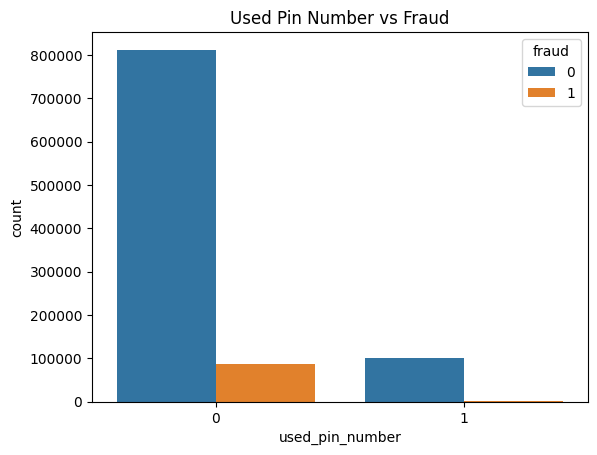

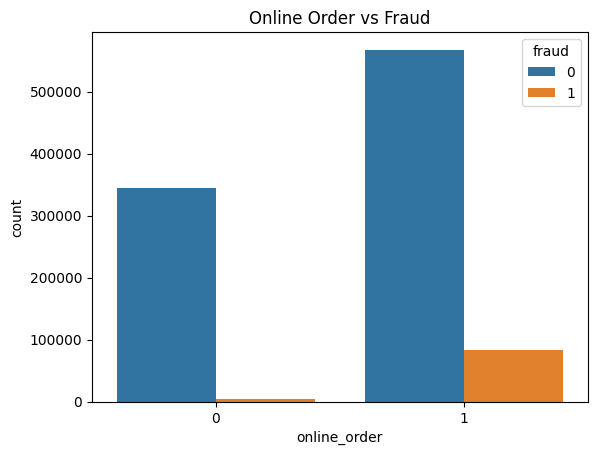

In [11]:
# Display How  fraud and non-fraud transactions are distributed across the different features.

sns.countplot(x='repeat_retailer', hue='fraud', data=df)
plt.title('Repeat Retailer vs Fraud')
plt.show()

sns.countplot(x='used_chip', hue='fraud', data=df)
plt.title('Used Chip vs Fraud')
plt.show()

sns.countplot(x='used_pin_number', hue='fraud', data=df)
plt.title('Used Pin Number vs Fraud')
plt.show()

sns.countplot(x='online_order', hue='fraud', data=df)
plt.title('Online Order vs Fraud')
plt.show()




In [12]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

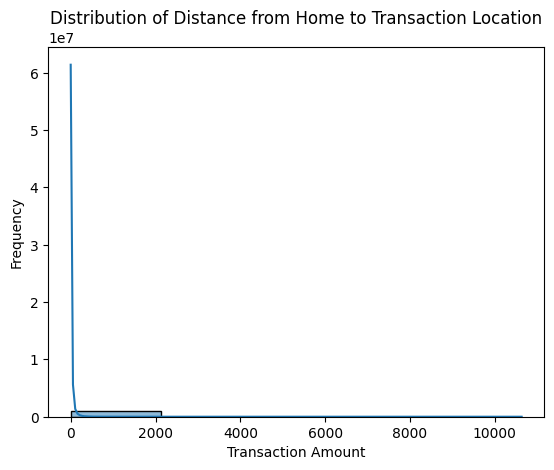

In [13]:
# Display the Distribution of Numerical (Continuous) Features.

sns.histplot(df['distance_from_home'],bins=5, kde=True)
plt.title('Distribution of Distance from Home to Transaction Location')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


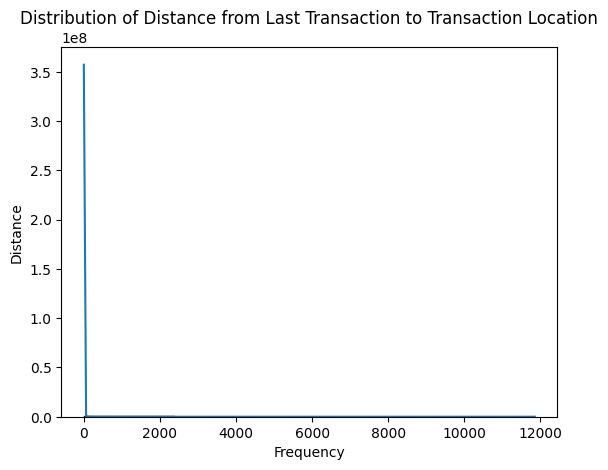

In [14]:
sns.histplot(df['distance_from_last_transaction'],bins=5,kde=True)
plt.title('Distribution of Distance from Last Transaction to Transaction Location')
plt.xlabel('Frequency')
plt.ylabel('Distance')
plt.show()


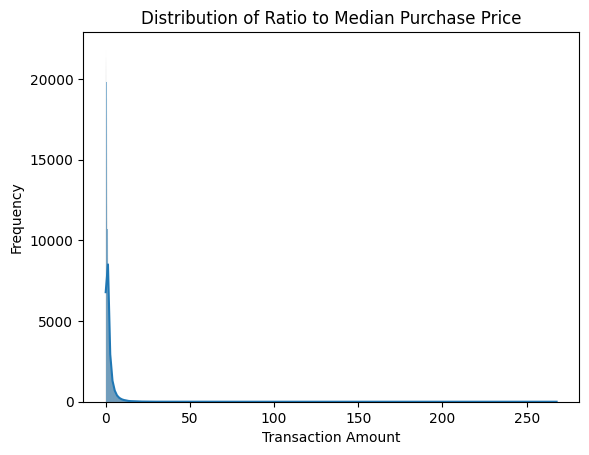

In [15]:
sns.histplot(df['ratio_to_median_purchase_price'], kde=True)
plt.title('Distribution of Ratio to Median Purchase Price')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

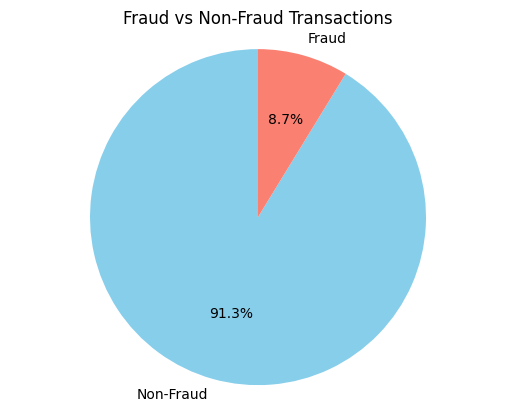

In [16]:
import matplotlib.pyplot as plt

# Count values
fraud_counts = df['fraud'].value_counts()

# Plot pie chart using matplotlib
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

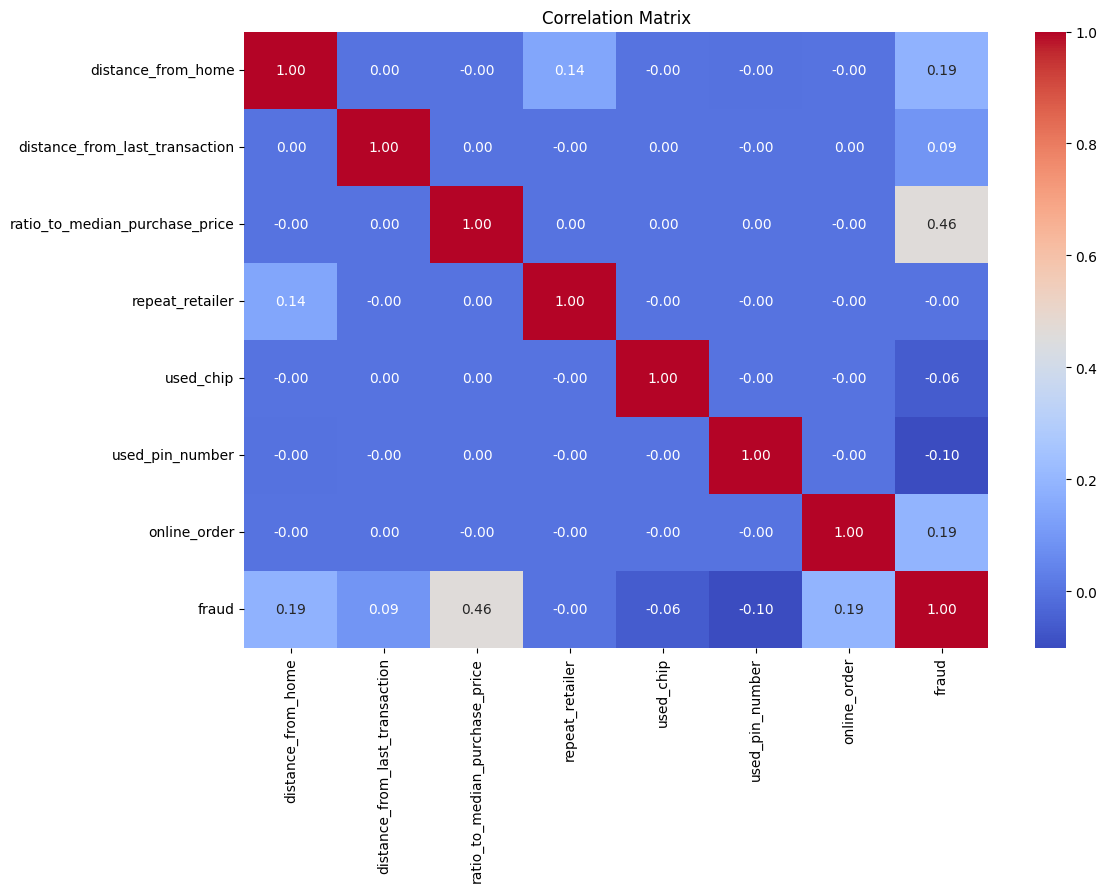

In [17]:
# Checking for the Correlation between the features.

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')


In [18]:
# The Distribution of the Numerical (Contineous) Features is not Normal. 

df['distance_from_home'].describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

In [19]:
df['distance_from_last_transaction'].describe()

count    1000000.000000
mean           5.036519
std           25.843093
min            0.000118
25%            0.296671
50%            0.998650
75%            3.355748
max        11851.104565
Name: distance_from_last_transaction, dtype: float64

In [20]:
df['ratio_to_median_purchase_price'].describe()

count    1000000.000000
mean           1.824182
std            2.799589
min            0.004399
25%            0.475673
50%            0.997717
75%            2.096370
max          267.802942
Name: ratio_to_median_purchase_price, dtype: float64

# Creating the Target Variable and Independent Variables for the model


In [21]:
X = df.drop(['fraud'], axis=1)
y = df['fraud']

# Creating the ML Model for Prediction 

In [22]:
# Importing the Essentials

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [24]:
# Checking the Value Counts and Shape of X_train and y_train and X_test and y_test.

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("-----------------------------------------------------------------")

print("y_train value counts:",y_train.value_counts())
print("y_test value counts:",y_test.value_counts())



X_train shape: (700000, 7)
y_train shape: (700000,)
X_test shape: (300000, 7)
y_test shape: (300000,)
-----------------------------------------------------------------
y_train value counts: fraud
0    638726
1     61274
Name: count, dtype: int64
y_test value counts: fraud
0    273871
1     26129
Name: count, dtype: int64


# UNDER SAMPLING METHOD

In [25]:
# As the Data is Imbalance we are using Under Sampling Technique to balance the Data.

from imblearn.under_sampling import RandomUnderSampler

# Create an instance of the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Fit and apply the random undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [26]:
# Checking the value of the y_resample data.

print("y_resampled value counts:", y_resampled.value_counts())

y_resampled value counts: fraud
0    61274
1    61274
Name: count, dtype: int64


In [27]:
# Checking the Shape of the X_resampled and y_resampled data.

print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (122548, 7)
y_resampled shape: (122548,)


In [28]:
# Using this resampled data to train and test the Model and apply standard scaler for Numerical (Contineous Features) as they are skewed.


#  Identify numerical columns to scale
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']  

#  Apply StandardScaler
scaler = StandardScaler()
X_resampled[numerical_cols] = scaler.fit_transform(X_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Logistic Regression Model

The Accuracy_Score for the LR_model is : 0.93365
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    273871
           1       0.57      0.95      0.71     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



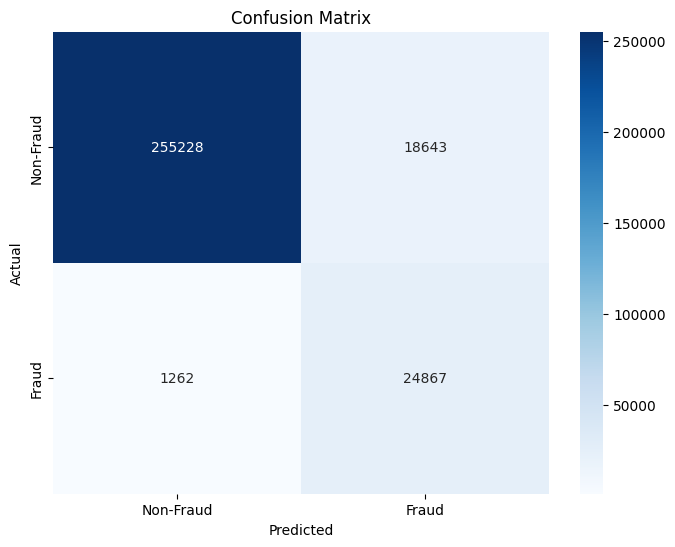

In [30]:
# Creating Logistic Regression Model.
LR_model = LogisticRegression (random_state=42)
# Fitting the Model on the Resampled Data.
LR_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = LR_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the LR_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Model - Grid Search CV

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
The Accuracy_Score for the best LR_model is : 0.9336433333333334
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    273871
           1       0.57      0.95      0.71     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



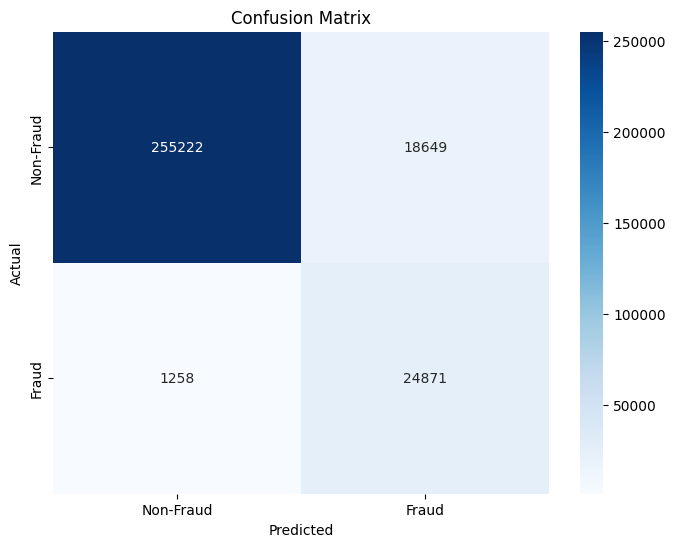

In [31]:

# Definding the Parameters for the Logistic Regression Model.
param_grid = {
    'C': [0.01, 0.1, 1, 10],              # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],# Regularization types
    'solver': ['liblinear', 'saga'],      # Solvers that support l1 and elasticnet
    'max_iter': [100, 200, 500]
}

# Step 2: Initialize Logistic Regression (don't set penalty or C here)
logreg = LogisticRegression(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,       # 5-fold cross-validation
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Step 4: Fit on resampled data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 6: Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("The Accuracy_Score for the best LR_model is :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Classifier

The Accuracy_Score for the DT_model is : 0.99988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



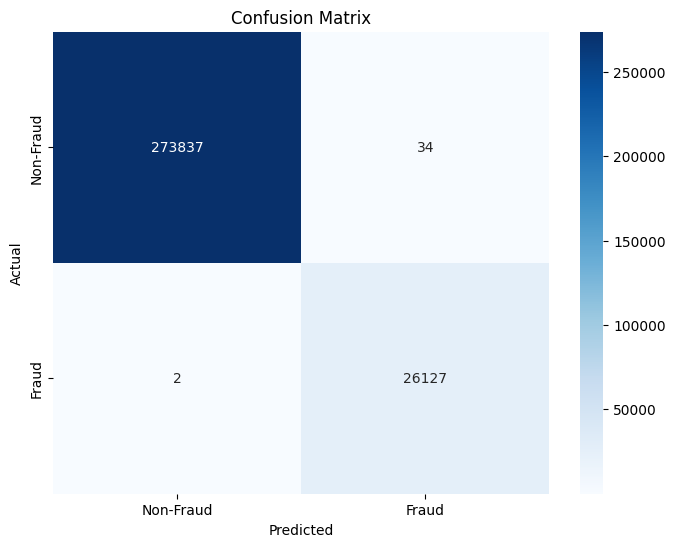

In [32]:
# Creating Decision Tree Classifier Model.
DT_model = DecisionTreeClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
DT_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = DT_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the DT_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree - Grid Search CV

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
The Accuracy_Score for the best LR_model is : 0.99925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       0.99      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



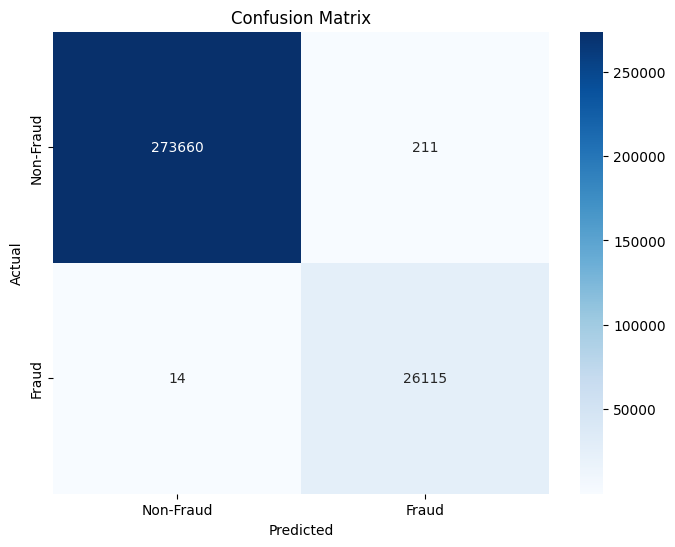

In [33]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Step 2: Initialize Logistic Regression (don't set penalty or C here)
dt = DecisionTreeClassifier(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,       # 5-fold cross-validation
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Step 4: Fit on resampled data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Use the best model to predict
best_model_dt = grid_search.best_estimator_
y_pred = best_model_dt.predict(X_test)

# Step 6: Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("The Accuracy_Score for the best LR_model is :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors 

The Accuracy_Score for the KNN_model is : 0.9943966666666667
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    273871
           1       0.94      1.00      0.97     26129

    accuracy                           0.99    300000
   macro avg       0.97      1.00      0.98    300000
weighted avg       0.99      0.99      0.99    300000



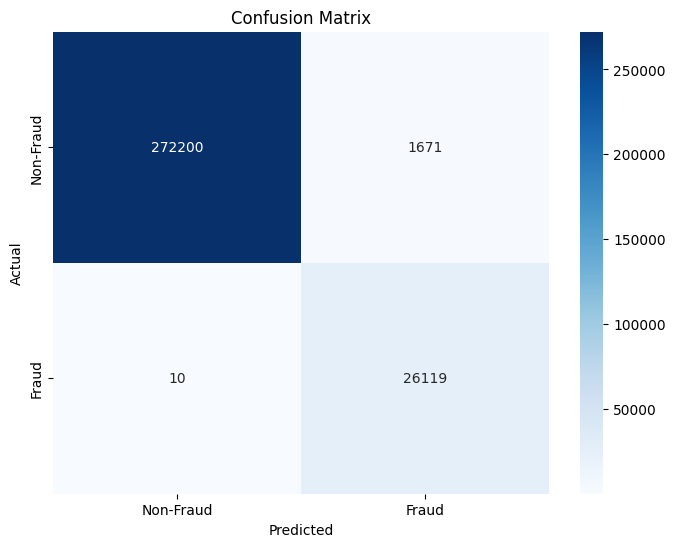

In [35]:
# Creating KNN Classifier Model.
KNN_model = KNeighborsClassifier ()
# Fitting the Model on the Resampled Data.
KNN_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = KNN_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the KNN_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

KNN Model Grid Seach CV

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
The Accuracy_Score for the best LR_model is : 0.9954966666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       0.95      1.00      0.97     26129

    accuracy                           1.00    300000
   macro avg       0.98      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000



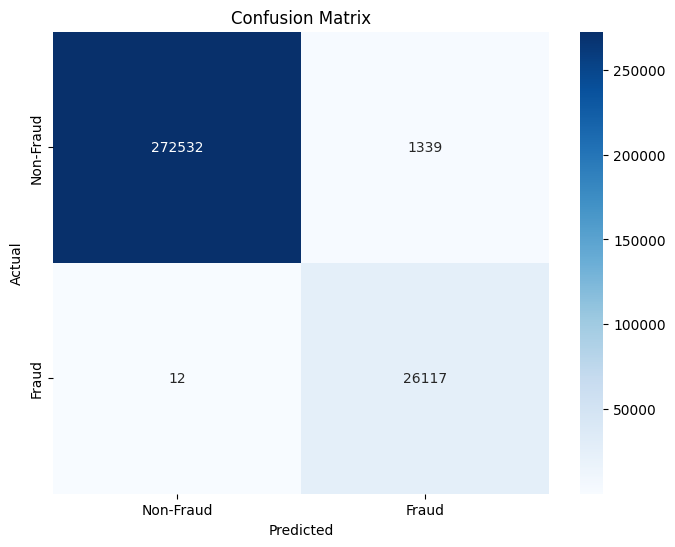

In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],         # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
}

# Step 2: Initialize Logistic Regression (don't set penalty or C here)
knn = KNeighborsClassifier()

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,       # 5-fold cross-validation
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Step 4: Fit on resampled data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Use the best model to predict
best_model_knn = grid_search.best_estimator_
y_pred = best_model_knn.predict(X_test)

# Step 6: Evaluate the model
print("Best Parameters:", grid_search.best_params_)
print("The Accuracy_Score for the best LR_model is :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Model

The Accuracy_Score for the rf_model is : 0.99991
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



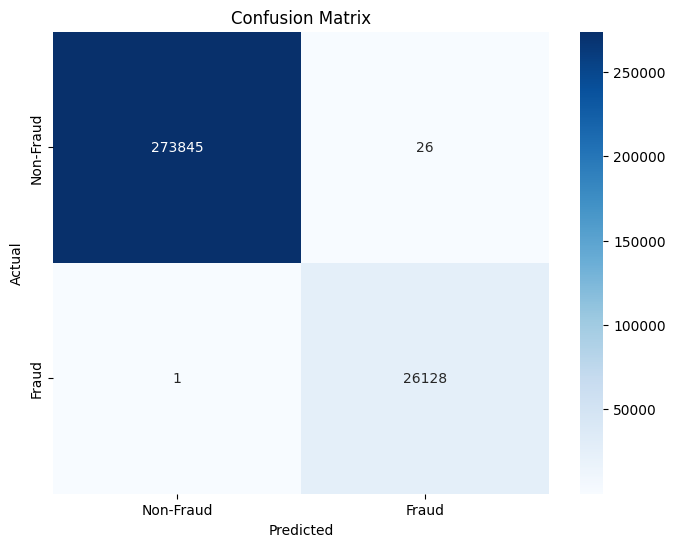

In [36]:
# Creating Random Forest Classifier Model.
rf_model = RandomForestClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
rf_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = rf_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the rf_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Grid Search CV

The Accuracy_Score for the ADA_model is : 0.9702366666666666
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    273871
           1       0.75      1.00      0.85     26129

    accuracy                           0.97    300000
   macro avg       0.87      0.98      0.92    300000
weighted avg       0.98      0.97      0.97    300000



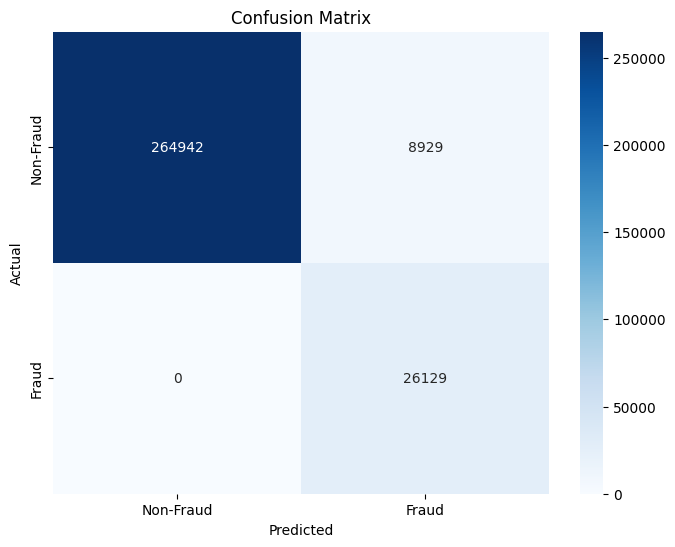

In [ ]:
# Creating ADA Boost Classifier Model.

# Creating XG Boost Classifier Model.
ADA_model = AdaBoostClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
ADA_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = ADA_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the ADA_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 


XG Boost Classifier

The Accuracy_Score for the XGB_model is : 0.99694
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    273871
           1       0.97      1.00      0.98     26129

    accuracy                           1.00    300000
   macro avg       0.98      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000



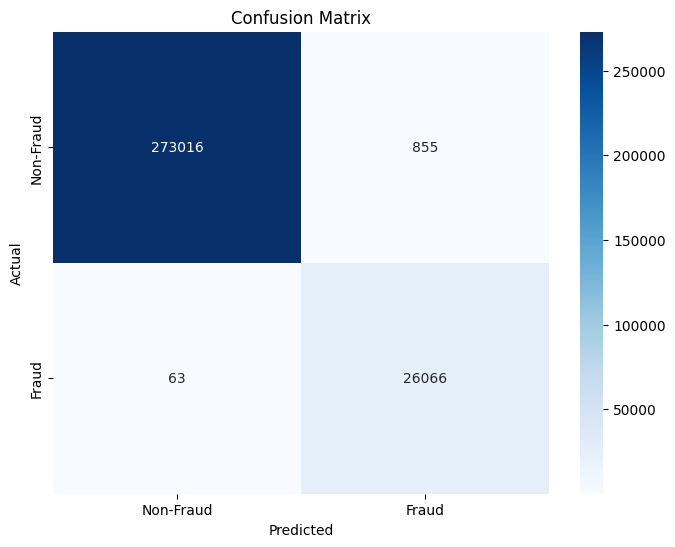

In [ ]:
# Creating XG Boost Classifier Model.
XGB_model = XGBClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
XGB_model.fit(X_resampled, y_resampled)
# Making Predictions on the Test Data.
y_pred = XGB_model.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the XGB_model is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# OVER SAMPLING

In [ ]:
# As the Data is Imbalance we are using Under Sampling Technique to balance the Data.

from imblearn.over_sampling import RandomOverSampler

# Create an instance of the RandomUnderSampler
ros = RandomOverSampler(random_state=42)
# Fit and apply the random undersampling
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [56]:
print("y_oversampled value counts:", y_oversampled.value_counts())

y_oversampled value counts: fraud
0    638726
1    638726
Name: count, dtype: int64


In [57]:
# Checking the Shape of the X_oversampled and y_oversampled data.

print("X_oversampled shape:", X_oversampled.shape)
print("y_oversampled shape:", y_oversampled.shape)

X_oversampled shape: (1277452, 7)
y_oversampled shape: (1277452,)


In [58]:
# Using this resampled data to train and test the Model and apply standard scaler for Numerical (Contineous Features) as they are skewed.


#  Identify numerical columns to scale
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']  

#  Apply StandardScaler
scaler = StandardScaler()
X_oversampled[numerical_cols] = scaler.fit_transform(X_oversampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Logistic Regression Model

The Accuracy_Score for the logistic is : 0.9145966666666666
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    273871
           1       0.95      0.02      0.04     26129

    accuracy                           0.91    300000
   macro avg       0.93      0.51      0.50    300000
weighted avg       0.92      0.91      0.88    300000



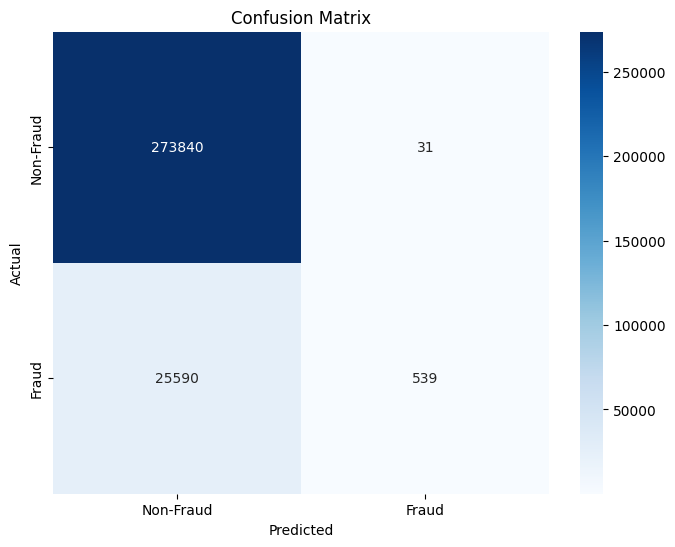

In [ ]:
# Creating Logistic Regression Model.
logistic = LogisticRegression (random_state=42)
# Fitting the Model on the Resampled Data.
logistic.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = logistic.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the logistic is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree

The Accuracy_Score for the Decision Tree  is : 0.9138966666666667
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    273871
           1       0.81      0.02      0.03     26129

    accuracy                           0.91    300000
   macro avg       0.86      0.51      0.49    300000
weighted avg       0.90      0.91      0.87    300000



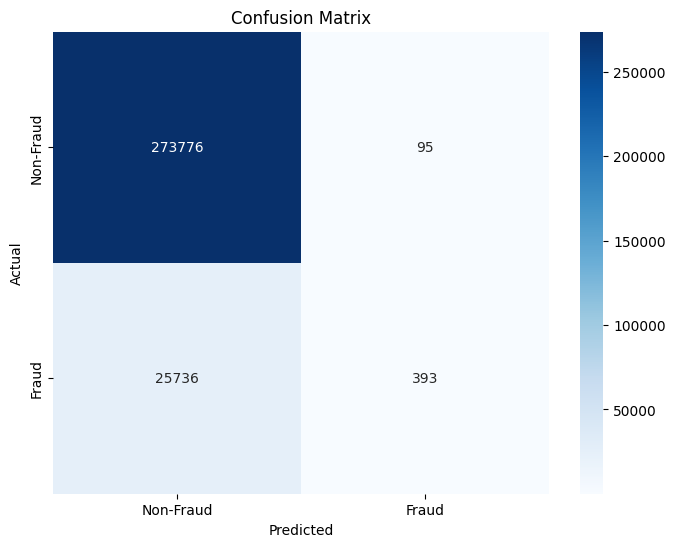

In [61]:
# Creating Decision Tree Model.
DecisionTree = DecisionTreeClassifier (random_state=42)
# Fitting the Model on the Resampled Data.
DecisionTree.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = DecisionTree.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the Decision Tree  is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K- Nearest Neighbours

The Accuracy_Score for the KNN_classifier  is : 0.91422
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    273871
           1       1.00      0.02      0.03     26129

    accuracy                           0.91    300000
   macro avg       0.96      0.51      0.49    300000
weighted avg       0.92      0.91      0.87    300000



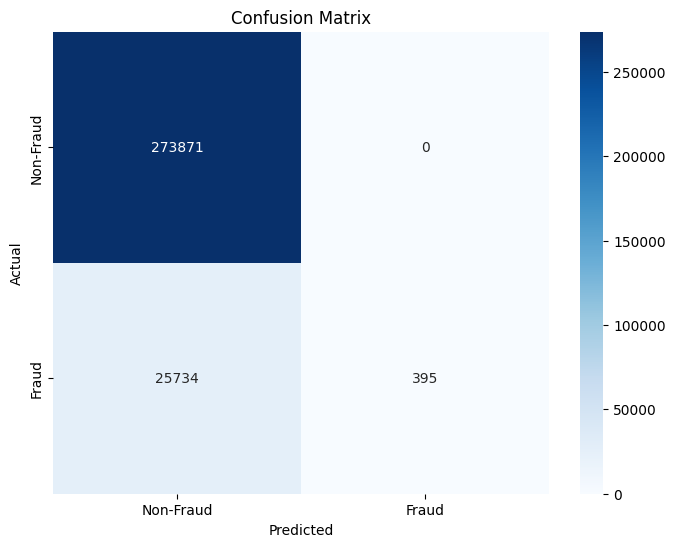

In [62]:
# Creating KNN  Model.
KNN_classifier = KNeighborsClassifier ( )
# Fitting the Model on the Resampled Data.
KNN_classifier.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = KNN_classifier.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the KNN_classifier  is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Model

The Accuracy_Score for the Random Forest Classifier  is : 0.9141966666666667
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    273871
           1       0.99      0.02      0.03     26129

    accuracy                           0.91    300000
   macro avg       0.95      0.51      0.49    300000
weighted avg       0.92      0.91      0.87    300000



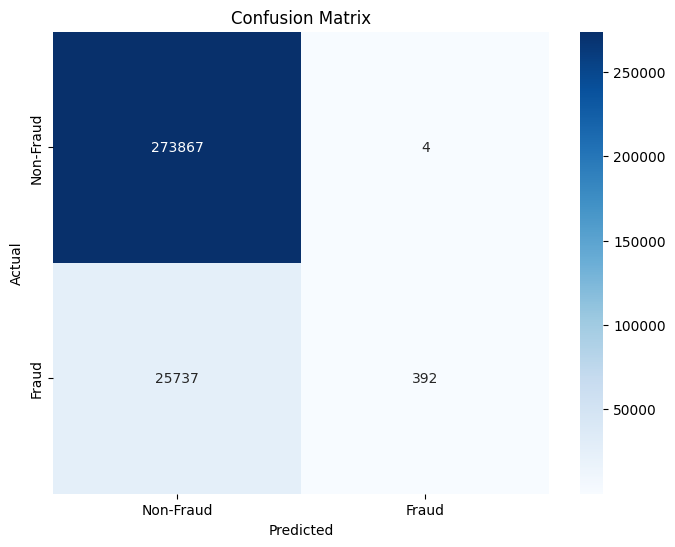

In [63]:
# Creating Random Forest Model.
Randomforest = RandomForestClassifier ( )
# Fitting the Model on the Resampled Data.
Randomforest.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = Randomforest.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the Random Forest Classifier  is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ada Boost Model

The Accuracy_Score for the Ada boost Classifier  is : 0.91382
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    273871
           1       0.77      0.02      0.03     26129

    accuracy                           0.91    300000
   macro avg       0.84      0.51      0.49    300000
weighted avg       0.90      0.91      0.87    300000



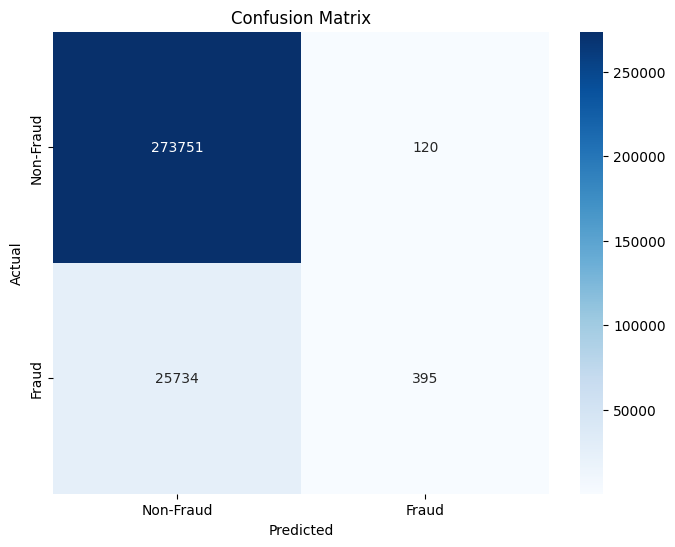

In [64]:
# Creating Ada Boost  Model.
adaboost = AdaBoostClassifier ( )
# Fitting the Model on the Resampled Data.
adaboost.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = adaboost.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the Ada boost Classifier  is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XG Boost Model

The Accuracy_Score for the XG boost Classifier  is : 0.91415
              precision    recall  f1-score   support

           0       0.91      1.00      0.96    273871
           1       0.97      0.01      0.03     26129

    accuracy                           0.91    300000
   macro avg       0.94      0.51      0.49    300000
weighted avg       0.92      0.91      0.87    300000



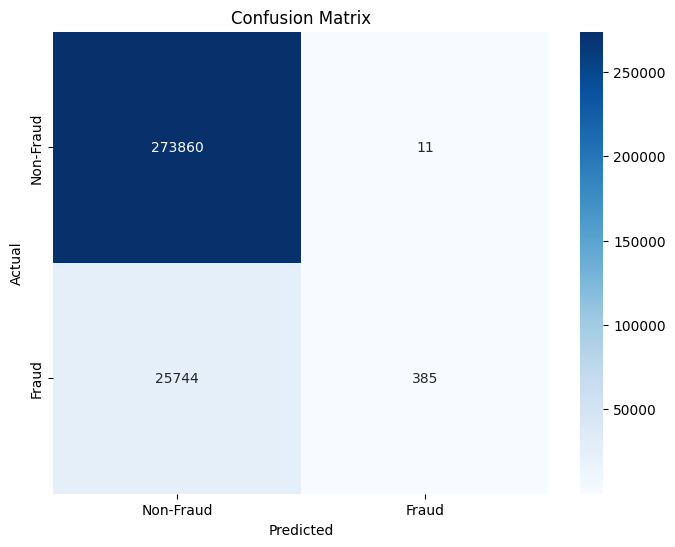

In [65]:
# Creating XG Boost  Model.
XGB = XGBClassifier ( )
# Fitting the Model on the Resampled Data.
XGB.fit(X_oversampled, y_oversampled)
# Making Predictions on the Test Data.
y_pred = XGB.predict(X_test)


# Checking the Classification Report and Confusion Matrix.


print("The Accuracy_Score for the XG boost Classifier  is :", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  


['scaler.pkl']